In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Starten einer Spark Session
spark = SparkSession.builder \
    .appName("Emission Data Visualization") \
    .getOrCreate()

24/06/22 15:57:30 WARN Utils: Your hostname, MacBook-Pro-von-Gregoire.local resolves to a loopback address: 127.0.0.1; using 192.168.0.248 instead (on interface en0)
24/06/22 15:57:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/22 15:57:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
emission_data = [{"2000": 7.3015565276, "2001": 7.3445498509, "2002": 7.5910820191, "2003": 7.6661065819,
                  "2004": 7.9264551349, "2005": 8.022971702, "2006": 8.247301388, "2007": 8.3558799857,
                  "2008": 8.4741724795, "2009": 8.4774061324, "2010": 8.3759737748, "2011": 8.4235682823,
                  "2012": 8.7662938718, "2013": 9.291035915, "2014": 9.8128903391, "2015": 10.1173860799,
                  "2016": 10.4965465177, "2017": 10.8414736715, "2018": 10.6853845334, "2019": 10.6693128165,
                  "2020": 10.9580914025, "2021": 11.1264878349, "2022": 11.0597619728}]

In [3]:
pdf = pd.DataFrame(emission_data)

In [4]:
sdf = spark.createDataFrame(pdf)

In [5]:
sdf.show()

+------------+------------+------------+------------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+-----------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|        2000|        2001|        2002|        2003|        2004|       2005|       2006|        2007|        2008|        2009|        2010|        2011|        2012|       2013|        2014|         2015|         2016|         2017|         2018|         2019|         2020|         2021|         2022|
+------------+------------+------------+------------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+-----------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|7.3015565276|7.3445498509|7.5910820191|7.6661065819|7.9264551349|8.022971702|8.24

In [6]:
pdf_viz = sdf.toPandas()

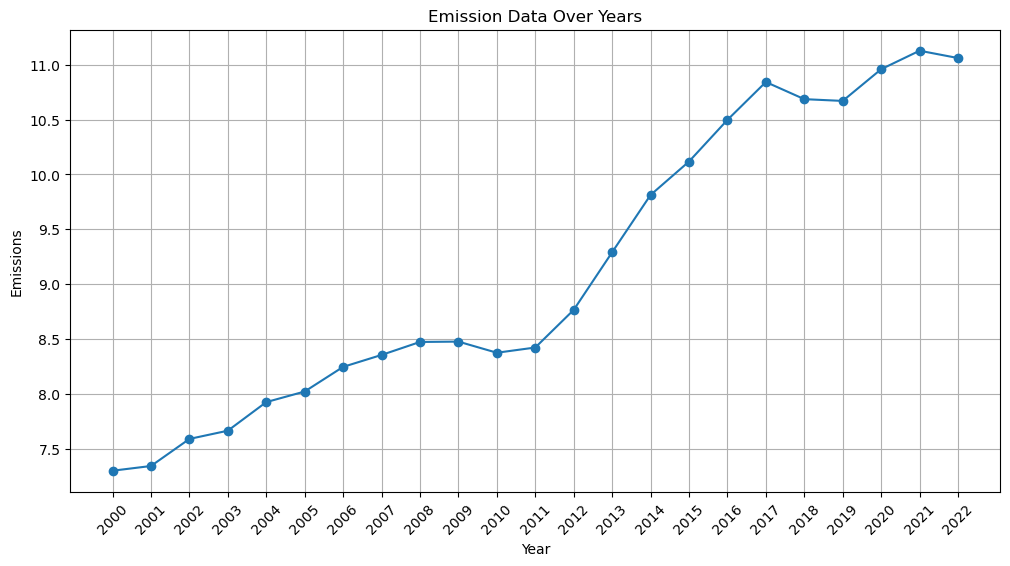

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(pdf_viz.columns, pdf_viz.iloc[0], marker='o')
plt.title('Emission Data Over Years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [8]:
spark.stop()